In [120]:
import numpy as np
import matplotlib.pyplot as plt

import math
import random

### **Random data generation**

In [121]:
data = []

In [122]:
data_min, data_max = 10, 50
error_min, error_max = 30, 40
data_length = 100

data += [random.randint(data_min, data_max) for _ in range(data_length)]

for i in range(50, data_length):
    if random.randint(1, 20) == 1:
        data[i] += random.choice([-1, 1]) * random.randint(error_min, error_max)

In [123]:
data_min, data_max = -2, 4
error_min, error_max = 0, 2
data_length = 50

data += [random.randint(data_min, data_max) for _ in range(data_length)]

for i in range(data_length):
    if random.randint(1, 20) == 1:
        data[i] += random.choice([-1, 1]) * random.randint(error_min, error_max)

In [124]:
data_min, data_max = 10, 50
error_min, error_max = 6, 18
data_length = 550

data += [random.randint(data_min, data_max) for _ in range(data_length)]

for i in range(50, data_length):
    if random.randint(1, 20) == 1:
        data[i] += random.choice([-1, 1]) * random.randint(error_min, error_max)

In [125]:
with open('data.txt',  'w') as f:
    f.write(' '.join([str(i) for i in data]))

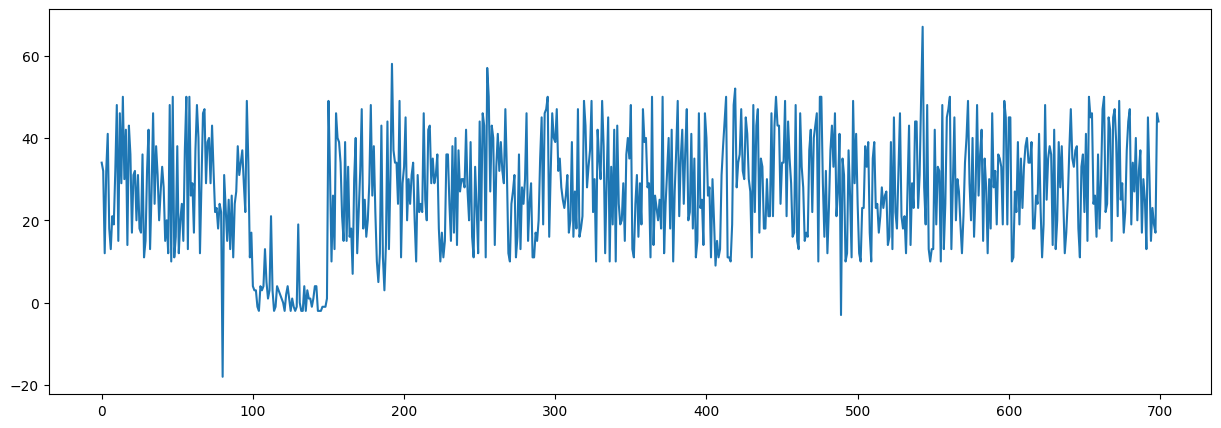

In [126]:
plt.figure(figsize=(15, 5), clear=False)
plt.plot(np.arange(len(data)), np.array(data))

### **Statistics**

In [127]:
def offline_mean(data: list[int | float]) -> float:
    return sum(data) / len(data)

In [128]:
def offline_variance(data: list[int | float]) -> float:
    mean_d = offline_mean(data)
    return sum([i * i for i in data]) / len(data) - mean_d * mean_d

In [129]:
def online_mean(new_data: int | float, old_mean: float, n: int) -> float:
    if n == 0:
        return new_data
    return (n*old_mean + new_data) / (n+1)

In [130]:
def online_variance(new_data: int | float, old_variance: float, old_mean: float, n: int) -> (float, float):
    if n == 0:
        return 0, new_data
    new_mean = online_mean(new_data, old_mean, n)

    new_variance = (n*(n+1)*old_variance + n*(new_data-old_mean)**2) / (n+1)**2
    return new_variance, new_mean

### **Global SQC**

In [131]:
mean_d = offline_mean(data)
variance_d = offline_mean(data)

lcl = mean_d - 3 * math.sqrt(variance_d)
ucl = mean_d + 3 * math.sqrt(variance_d)

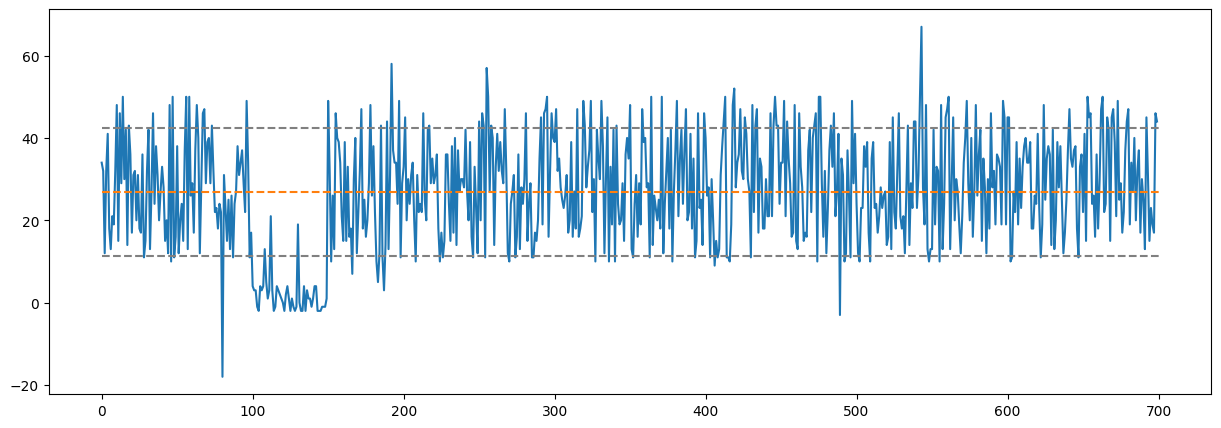

In [132]:
plt.figure(figsize=(15, 5))
plt.plot(np.arange(len(data)), data)
plt.plot([0, len(data)], [mean_d, mean_d], linestyle='dashed')
plt.plot([0, len(data)], [lcl, lcl], linestyle='dashed', color='grey')
plt.plot([0, len(data)], [ucl, ucl], linestyle='dashed', color='grey')

### **Online SQC**

In [133]:
mean_d_o = data[0]
variance_d_o = 0

mean_list = len(data) * [0]
variance_list = len(data) * [0]

for i in range(len(data)):
    variance_d_o, mean_d_o = online_variance(data[i], variance_d_o, mean_d_o, i)
    mean_list[i] = mean_d_o
    variance_list[i] = variance_d_o

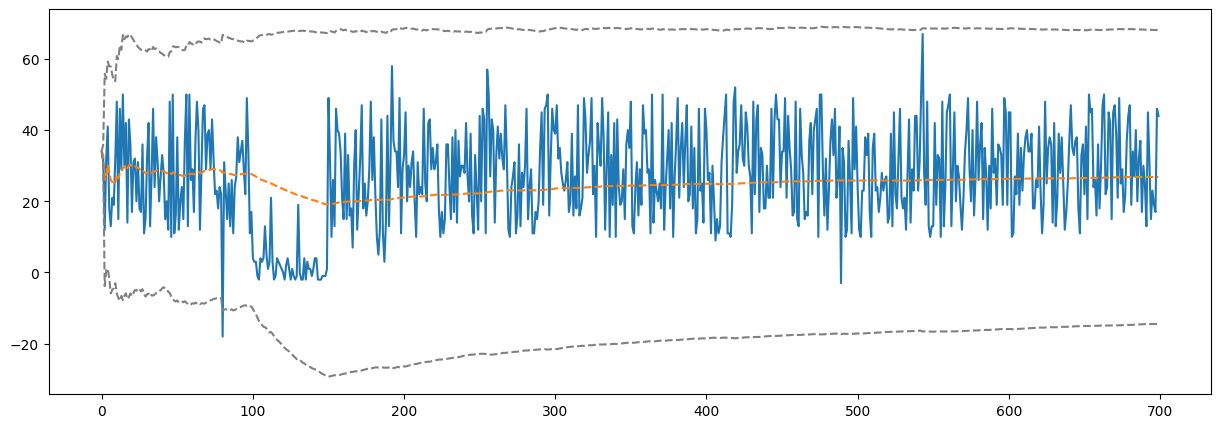

In [134]:
plt.figure(figsize=(15, 5))
plt.plot(np.arange(len(data)), data)
plt.plot(np.arange(len(data)), mean_list, linestyle='dashed')
plt.plot(np.arange(len(data)), [mean_list[i] + 3*math.sqrt(variance_list[i]) for i in range(len(data))], linestyle='dashed', color='grey')
plt.plot(np.arange(len(data)), [mean_list[i] - 3*math.sqrt(variance_list[i]) for i in range(len(data))], linestyle='dashed', color='grey')

### **Penalized SQC**

In [ ]:
mean_d_o_p = data[0]
variance_d_o_p = 0

data_p = [0] * len(data)

mean_list_p = len(data) * [0]
variance_list_p = len(data) * [0]

k = 0.1

for i in range(len(data)):
    data_p[i] = data[i] * (1 - k) + k * mean_d_o_p
    variance_d_o_p, mean_d_o_p = online_variance(data_p[i], variance_d_o_p, mean_d_o_p, i)
    mean_list_p[i] = mean_d_o_p
    variance_list_p[i] = variance_d_o_p

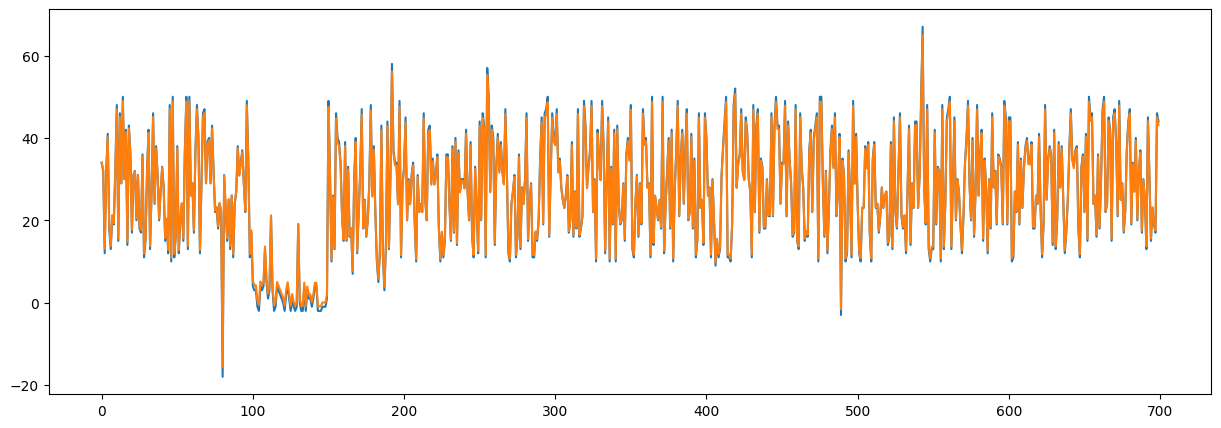

In [136]:
plt.figure(figsize=(15, 5))
plt.plot(np.arange(len(data)), data)
plt.plot(np.arange(len(data)), data_p)

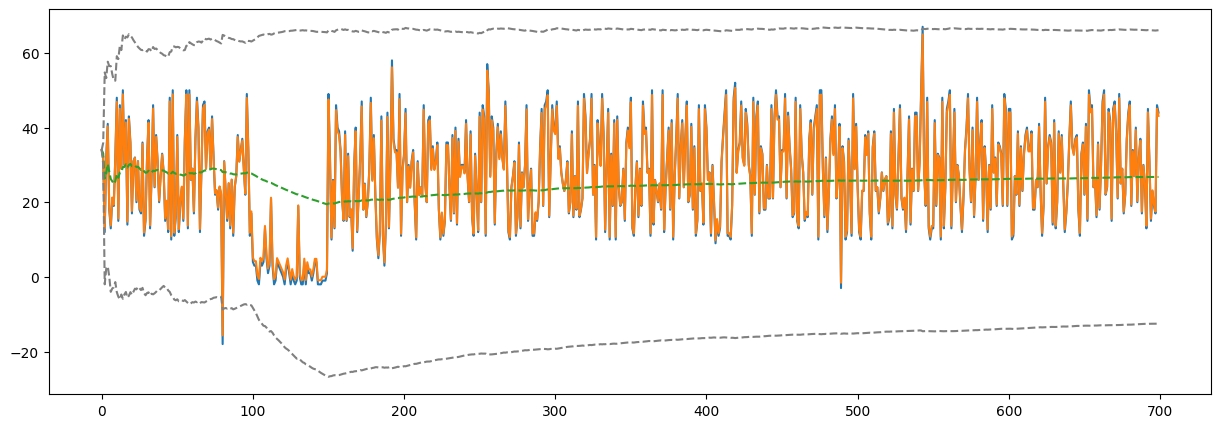

In [137]:
plt.figure(figsize=(15, 5))
plt.plot(np.arange(len(data)), data)
plt.plot(np.arange(len(data)), data_p)
plt.plot(np.arange(len(data)), mean_list_p, linestyle='dashed')
ucl_list_p = [mean_list_p[i] + 3*math.sqrt(variance_list_p[i]) for i in range(len(data))]
lcl_list_p = [mean_list_p[i] - 3*math.sqrt(variance_list_p[i]) for i in range(len(data))]
plt.plot(np.arange(len(data)), ucl_list_p, linestyle='dashed', color='grey')
plt.plot(np.arange(len(data)), lcl_list_p, linestyle='dashed', color='grey')